# Ireland basemaps and boundaries

In [1]:
import os
from datetime import datetime, timezone
from zipfile import BadZipFile, ZipFile

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

## NUTS Island of Ireland boundary

<https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts>

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "boundaries", "NUTS2021")
os.makedirs(DATA_DIR, exist_ok=True)

URL = (
    "https://gisco-services.ec.europa.eu/distribution/v2/nuts/download/"
    "ref-nuts-2021-01m.shp.zip"
)
KNOWN_HASH = None
FILE_NAME = "ref-nuts-2021-01m.shp.zip"

# file name for the GeoPackage where the boundary vector layer will be saved
OUT_DIR = os.path.join("data", "basemaps")
os.makedirs(OUT_DIR, exist_ok=True)
GPKG_BOUNDARY = os.path.join(OUT_DIR, "ref-nuts-2021-01m.gpkg")

DATA_DIR_TEMP = os.path.join(DATA_DIR, "temp")

os.makedirs(DATA_DIR_TEMP, exist_ok=True)

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [5]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-8]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 4d51d3778405a528573707d8318bf1cbfd1b0386a2fa69873524c2e6420f740b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [6]:
with open(f"{DATA_FILE[:-8]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-09-11 13:46:00.00000+00:00
Download URL: https://gisco-services.ec.europa.eu/distribution/v2/nuts/download/ref-nuts-2021-01m.shp.zip


In [7]:
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_3035.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_3857.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_4326.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_3.shp.zip',
 'NUTS_LB_2021_3035.shp.zip',
 'NUTS_LB_2021_3035_LEVL_0.shp.zip',
 'NUTS_LB_2021_3035_LEVL_1.shp.zip',
 'NUTS_LB_2021_3035_LEVL_2.shp.zip',
 'NUTS_LB_2021_3035_LEVL_3.shp.zip',
 'NUTS_LB_2021_3857.shp.zip',
 'NUTS_LB_2021_3857_LEVL_0.shp.zip',
 'NUTS_LB_2021_3857_LEVL_1.shp.zip',
 'NUTS_LB_2021_3857_LEVL_2.shp.zip',
 'NUTS_LB_2021_3857_LEVL_3.shp.zip',
 'NUTS_LB_2021_4326.shp.zip',
 'NUTS_LB_2021_4326_

In [8]:
# extract the archive
try:
    z = ZipFile(DATA_FILE)
    z.extractall(DATA_DIR_TEMP)
except BadZipFile:
    print("There were issues with the file", DATA_FILE)

In [3]:
DATA_FILE = os.path.join(DATA_DIR_TEMP, "NUTS_RG_01M_2021_4326_LEVL_1.shp.zip")

In [6]:
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_4326_LEVL_1.cpg',
 'NUTS_RG_01M_2021_4326_LEVL_1.dbf',
 'NUTS_RG_01M_2021_4326_LEVL_1.prj',
 'NUTS_RG_01M_2021_4326_LEVL_1.shp',
 'NUTS_RG_01M_2021_4326_LEVL_1.shx']

In [4]:
nuts = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [5]:
nuts.shape

(125, 10)

In [6]:
nuts.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CY0,1,CY,Kýpros,Κύπρος,0,0,0,CY0,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35..."
1,DEA,1,DE,Nordrhein-Westfalen,Nordrhein-Westfalen,0,0,0,DEA,"POLYGON ((8.70301 52.50044, 8.69906 52.48690, ..."
2,CH0,1,CH,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,0,0,0,CH0,"POLYGON ((8.61383 47.80108, 8.62155 47.79372, ..."
3,FRE,1,FR,Hauts-de-France,Hauts-de-France,0,0,0,FRE,"MULTIPOLYGON (((2.60704 50.91269, 2.60665 50.9..."
4,BG3,1,BG,Severna i Yugoiztochna Bulgaria,Северна и Югоизточна България,0,0,0,BG3,"POLYGON ((22.67516 44.21566, 22.69084 44.20456..."


In [7]:
nuts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
nuts = nuts[nuts["NUTS_ID"].str.contains("IE0|UKN")]

In [9]:
nuts

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
67,IE0,1,IE,Ireland,Ireland,0,0,0,IE0,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
82,UKN,1,UK,Northern Ireland,Northern Ireland,0,0,0,UKN,"MULTIPOLYGON (((-5.97653 55.05660, -5.96650 55..."


In [11]:
ie = nuts.dissolve()

In [13]:
ie.bounds

,minx,miny,maxx,maxy
0,-10.661639,51.422593,-5.433173,55.435125


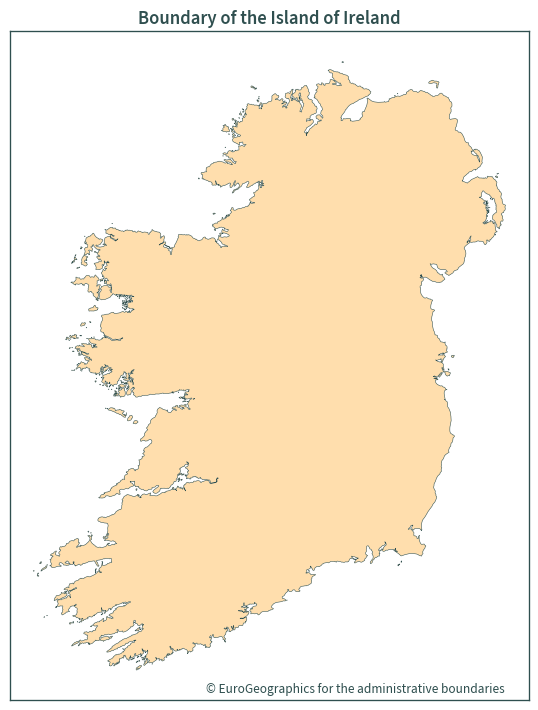

In [14]:
ie.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)

plt.title("Boundary of the Island of Ireland")
plt.text(-8.75, 51.275, "© EuroGeographics for the administrative boundaries")
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

## Provinces - OSi National Statutory Boundaries - 2019 - Ungeneralised

<https://data.gov.ie/dataset/provinces-osi-national-statutory-boundaries-2019>

In [15]:
URL = (
    "https://data-osi.opendata.arcgis.com/datasets/"
    "559bc3300384413aa0fe93f0772cb7f1_0.zip?"
    "outSR=%7B%22latestWkid%22%3A2157%2C%22wkid%22%3A2157%7D"
)
DATA_DIR = os.path.join("data", "boundaries")
FILE_NAME = "osi-provinces-ungeneralised-2019.zip"
DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

In [16]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-4]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 2410768c3c1252498812967354f90e42f7dc37003f99df73b3fe544cee85df3d
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [17]:
with open(f"{DATA_FILE[:-4]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-10-29 22:11:40.353067+00:00
Download URL: https://data-osi.opendata.arcgis.com/datasets/559bc3300384413aa0fe93f0772cb7f1_0.zip?outSR=%7B%22latestWkid%22%3A2157%2C%22wkid%22%3A2157%7D


In [18]:
ZipFile(DATA_FILE).namelist()

['Provinces___Ungen_2019.shp',
 'Provinces___Ungen_2019.shx',
 'Provinces___Ungen_2019.dbf',
 'Provinces___Ungen_2019.cpg',
 'Provinces___Ungen_2019.prj',
 'Provinces_-_National_Statutory_Boundaries_-_2019.xml']

In [19]:
data = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [20]:
data

,ESRI_OID,OBJECTID,PROVINCE,PV_ID,GUID,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,Connacht,27001,d1070df4-924a-4f2d-b35b-d165b6a5a264,537106.05,774821.52,1.770933e+10,3.682460e+06,1.770933e+10,"MULTIPOLYGON (((456212.468 744200.809, 456200...."
1,2,2,Leinster,27002,567d5f84-9a09-4d9b-b943-0b5be07a15da,664436.40,707866.98,1.979878e+10,1.313867e+06,1.979878e+10,"MULTIPOLYGON (((673229.094 598041.747, 673236...."
2,3,3,Munster,27003,32947409-6cfa-4731-bcd1-1cf12e8193f8,544013.20,616670.03,2.467955e+10,3.631145e+06,2.467955e+10,"MULTIPOLYGON (((430806.128 602244.549, 430815...."
3,4,4,Ulster,27004,0b3f0251-a1d9-47cc-ab6d-295962b93cd0,620526.73,873476.28,8.086132e+09,2.297473e+06,8.086132e+09,"MULTIPOLYGON (((549225.762 882044.879, 549218...."


In [21]:
data.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
data.shape

(4, 11)

In [24]:
data = data.dissolve()

In [25]:
data.bounds

,minx,miny,maxx,maxy
0,416216.755,519664.6145,734480.7393,966936.905


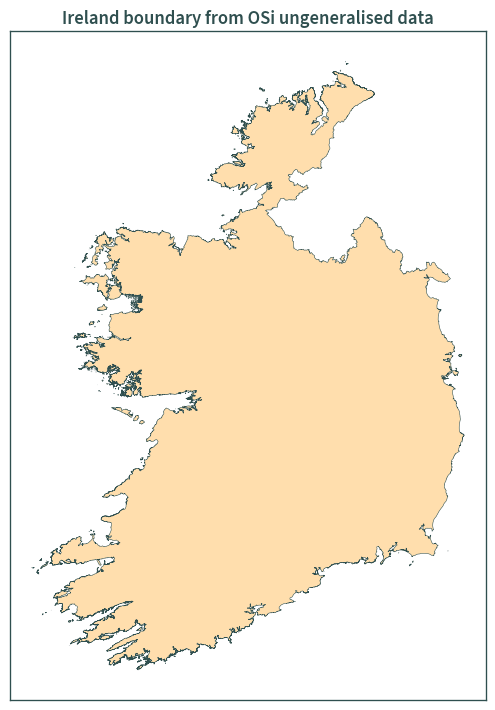

In [28]:
data.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)

plt.title("Ireland boundary from OSi ungeneralised data")
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

## Basemaps from xyzservices

<https://xyzservices.readthedocs.io/en/stable/gallery.html>

In [13]:
# bounding box limits with a ~50000 m buffer
bbox = ie.to_crs(23029).buffer(5e4).envelope
xmin, ymin, xmax, ymax = bbox.to_crs(3857).total_bounds

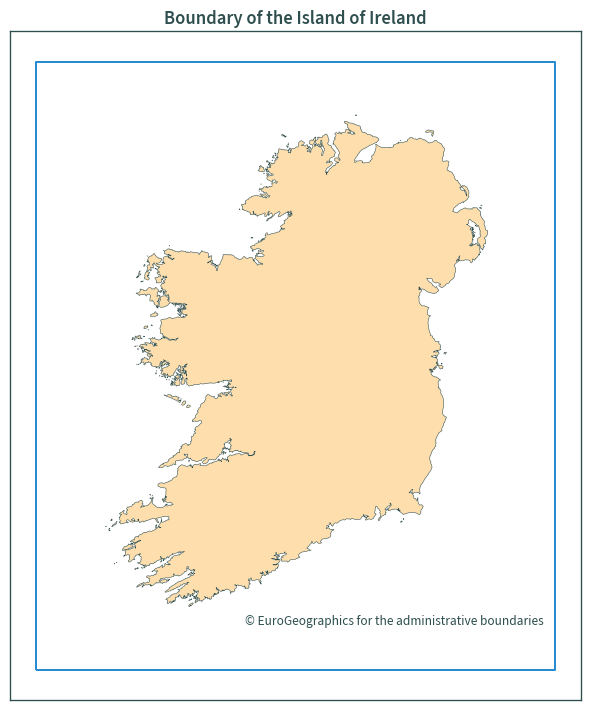

In [14]:
ax = ie.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)
bbox.to_crs(ie.crs).envelope.boundary.plot(ax=ax)
plt.title("Boundary of the Island of Ireland")
plt.text(-8.75, 51.275, "© EuroGeographics for the administrative boundaries")
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [27]:
def download_basemap(source, zoom):
    OUT_FILE = os.path.join(OUT_DIR, f"Ireland.{source['name']}.{zoom}.tif")
    if not os.path.isfile(OUT_FILE):
        irl = cx.bounds2raster(
            xmin, ymin, xmax, ymax,
            path=OUT_FILE,
            zoom=zoom,
            source=source
        )

    ax = bbox.to_crs(3857).boundary.plot(linewidth=0)
    cx.add_basemap(ax, source=OUT_FILE)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tight_layout()
    plt.show()

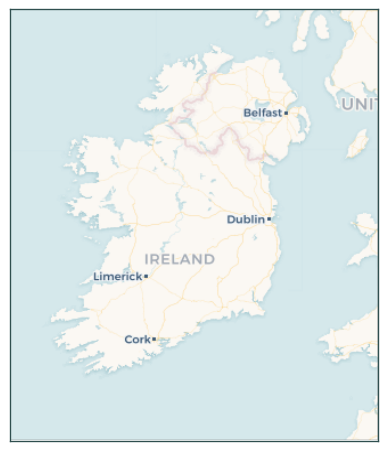

In [28]:
download_basemap(cx.providers.CartoDB.Voyager, 6)

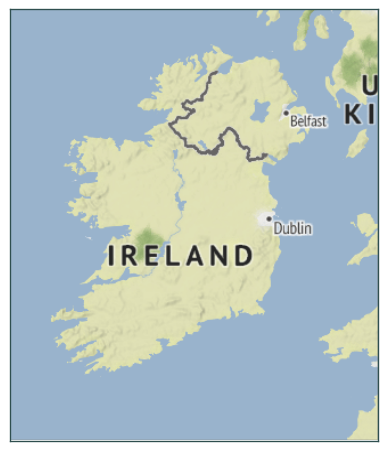

In [30]:
download_basemap(cx.providers.Stamen.Terrain, 6)

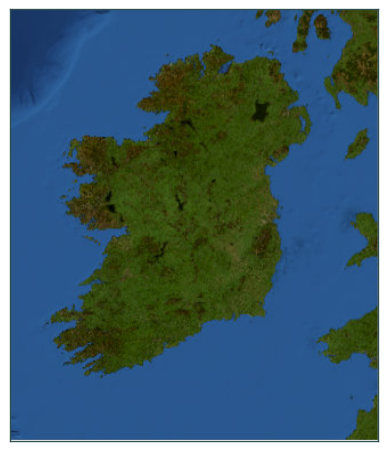

In [31]:
download_basemap(cx.providers.USGS.USImagery, 6)